In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"surabhigovil","key":"4b4a01fbc79aa74ee86dab961f0653f5"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

In [57]:
! kaggle datasets download -d 'tanlikesmath/diabetic-retinopathy-resized'

100% 7.24G/7.25G [01:52<00:00, 98.4MB/s]
100% 7.25G/7.25G [01:52<00:00, 69.1MB/s]


In [58]:
import zipfile
from google.colab import files
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

In [59]:
! unzip diabetic-retinopathy-resized.zip -d new_dataset

Streaming output truncated to the last 5000 lines.
  inflating: new_dataset/resized_train_cropped/resized_train_cropped/44260_right.jpeg  
  inflating: new_dataset/resized_train_cropped/resized_train_cropped/44261_left.jpeg  
  inflating: new_dataset/resized_train_cropped/resized_train_cropped/44261_right.jpeg  
  inflating: new_dataset/resized_train_cropped/resized_train_cropped/44262_left.jpeg  
  inflating: new_dataset/resized_train_cropped/resized_train_cropped/44262_right.jpeg  
  inflating: new_dataset/resized_train_cropped/resized_train_cropped/44263_left.jpeg  
  inflating: new_dataset/resized_train_cropped/resized_train_cropped/44263_right.jpeg  
  inflating: new_dataset/resized_train_cropped/resized_train_cropped/44264_left.jpeg  
  inflating: new_dataset/resized_train_cropped/resized_train_cropped/44264_right.jpeg  
  inflating: new_dataset/resized_train_cropped/resized_train_cropped/44265_left.jpeg  
  inflating: new_dataset/resized_train_cropped/resized_train_cropped/44265

In [60]:
train = pd.read_csv("/content/new_dataset/trainLabels.csv")
train.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


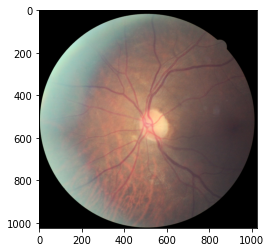

In [72]:
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline
testim = mpimg.imread('/content/new_dataset/resized_train_cropped/resized_train_cropped/10_left.jpeg')
imshow(testim)

In [26]:
import cv2
import numpy as np
import glob  # for read file from folder
import time  # for estimate processing time(optional)

In [73]:
# load image in gray scale
image_query = cv2.imread('/content/new_dataset/resized_train_cropped/resized_train_cropped/10_left.jpeg', cv2.IMREAD_GRAYSCALE)
train_image_list = cv2.imread('/content/new_dataset/resized_train_cropped/resized_train_cropped/15_left.jpeg', cv2.IMREAD_GRAYSCALE)

In [74]:
print(image_query.shape)

(1024, 1024)


In [75]:
# create ORB dectector
orb = cv2.ORB_create(nfeatures=2000)  # default features is 500

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(train_image_list,None)
kp2, des2 = orb.detectAndCompute(image_query,None)

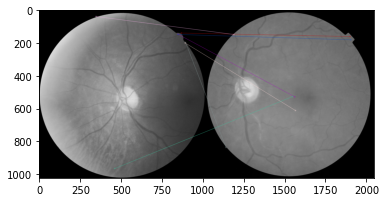

(<matplotlib.image.AxesImage at 0x7fb0d17293c8>, None)

In [76]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(image_query,kp1,train_image_list,kp2,matches,None,flags=2)

plt.imshow(img3),plt.show()